In [1]:
import cv2 as CV
import numpy as NP
import matplotlib.pyplot as PLT
import imutils as IM

In [2]:
LEFT_1 = CV.imread("left2.png")
RIGHT_1 = CV.imread("right2.png")
LEFT_1 = CV.cvtColor(LEFT_1,CV.COLOR_BGR2GRAY)
RIGHT_1 = CV.cvtColor(RIGHT_1,CV.COLOR_BGR2GRAY)
LEFT_1  = IM.resize(LEFT_1,200)
RIGHT_1  = IM.resize(RIGHT_1,200)

In [3]:

L_1 = NP.zeros((LEFT_1.shape[0]+2,LEFT_1.shape[1]+2))
R_1 = NP.zeros((LEFT_1.shape[0]+2,LEFT_1.shape[1]+2))
L_1[1:L_1.shape[0]-1,1:L_1.shape[1]-1] = LEFT_1
R_1[1:L_1.shape[0]-1,1:L_1.shape[1]-1] = RIGHT_1
DESP = NP.zeros((LEFT_1.shape[0],LEFT_1.shape[1]))

In [4]:
PATCH_1 = NP.zeros((3,3))
PATCH_2 = NP.zeros((3,3))
PATCH_3 = NP.zeros((3,3))
A1 = 0.0
for row in range(1,L_1.shape[0]-1):
    for col in range(1,L_1.shape[1]-1):
        PATCH_1 = L_1[row-1:row+2,col-1:col+2]
        if 130>=row>=7 and 194>=col>=7:
            for col2 in range(col-3,col+3):
                PATCH_2 = R_1[row-1:row+2,col2-1:col2+2]
                #print(NP.shape(PATCH_2),col2)
                A= NP.sum((PATCH_2 - PATCH_1))
                if A <=A1:
                    DESP[row-1,col-1] = col2-col
                A1 = A

In [5]:
DESP = NP.absolute(DESP)

In [6]:
#CV.imshow('ORIGINAL IMAGE',L_1)
#CV.imshow('DESPARITY',DESP)
#CV.waitKey(0)

Text(0.5,1,'LEFT_IMAGE')

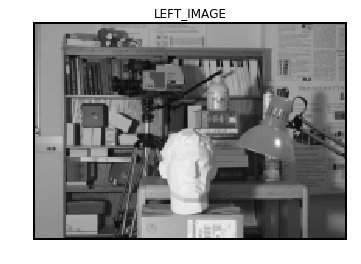

In [7]:
PLT.imshow(L_1,'gray')
PLT.axis('off')
PLT.title('LEFT_IMAGE')

Text(0.5,1,'RIGHT_IMAGE')

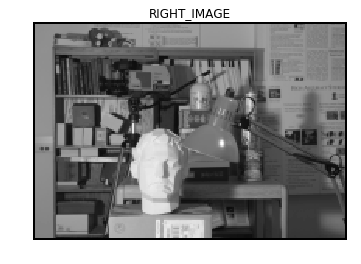

In [8]:
PLT.imshow(R_1,'gray')
PLT.axis('off')
PLT.title('RIGHT_IMAGE')

Text(0.5,1,'DISPARITY IMAGE')

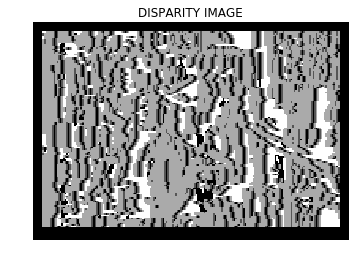

In [9]:
PLT.imshow(DESP,'gray')
PLT.axis('off')
PLT.title('DISPARITY IMAGE')